**Disclaimer**
<br>This model is adapted from [House prices prediction using keras](https://www.kaggle.com/code/hugosjoberg/house-prices-prediction-using-keras) (One example from the competition)



In [98]:
from tensorflow import keras
from keras.models import Sequential
from keras import metrics
from keras.layers import Activation, Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

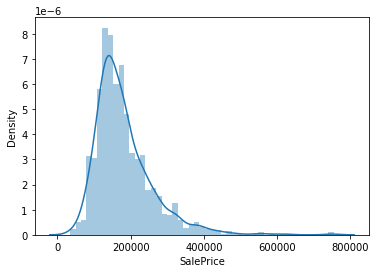

In [99]:
train = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/test.csv',engine="python")

#fill na with mean
train = train.fillna(train.mean())
test = test.fillna(test.mean())

#preview the sale price
sns.distplot(train['SalePrice'])


**Choosing X and Y inputs**<br>
checking to see the relevent associations in each column

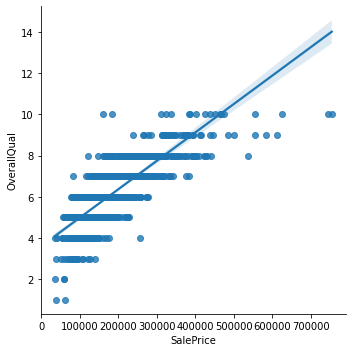

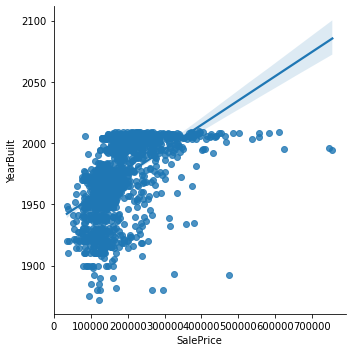

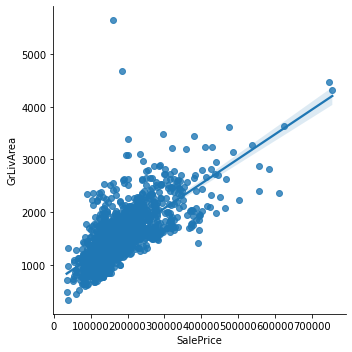

In [100]:

#sns.pairplot(train, kind='reg');
#After view through all the pattern (which take a long time to compute), here are possible x_train data

sns.lmplot(x='SalePrice', y='OverallQual', data=train)
sns.lmplot(x='SalePrice', y='YearBuilt', data=train)
sns.lmplot(x='SalePrice', y='GrLivArea', data=train)



In [101]:
train = pd.get_dummies(train)
#fill na with mean
train = train.fillna(train.mean())

X_train = train[['YearBuilt','GrLivArea','OverallQual']]
y_train = train['SalePrice'].values

scale = StandardScaler()
X_train = scale.fit_transform(X_train)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)


In [102]:
def create_model(): #adapt from reference code
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(optimizer ='adam', loss = 'mean_squared_error', 
            metrics =[metrics.mae])
  return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 40)                440       
                                                                 
 dense_6 (Dense)             (None, 50)                2050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,581
Trainable params: 2,581
Non-trainable params: 0
_________________________________________________________________


Epoch 1/180
31/31 [==============================] - 1s 8ms/step - loss: 39212486656.0000 - mean_absolute_error: 181908.7812 - val_loss: 38686404608.0000 - val_mean_absolute_error: 178913.0938
Epoch 2/180
31/31 [==============================] - 0s 5ms/step - loss: 39211249664.0000 - mean_absolute_error: 181905.3125 - val_loss: 38684160000.0000 - val_mean_absolute_error: 178906.5938
Epoch 3/180
31/31 [==============================] - 0s 4ms/step - loss: 39207034880.0000 - mean_absolute_error: 181893.7500 - val_loss: 38677016576.0000 - val_mean_absolute_error: 178886.5469
Epoch 4/180
31/31 [==============================] - 0s 5ms/step - loss: 39195312128.0000 - mean_absolute_error: 181860.9375 - val_loss: 38658285568.0000 - val_mean_absolute_error: 178834.7656
Epoch 5/180
31/31 [==============================] - 0s 5ms/step - loss: 39167234048.0000 - mean_absolute_error: 181785.1406 - val_loss: 38617407488.0000 - val_mean_absolute_error: 178723.0000
Epoch 6/180
31/31 [================

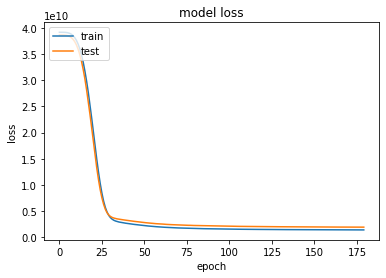

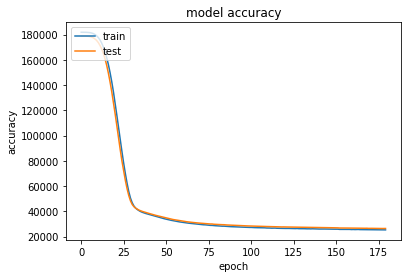

In [103]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=180, batch_size=32)

#training loss (from reference code)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#accuracy $ (from reference code)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This model has under 0.5 loss 
and around $25k inaccuracy in the price range of ~800k


In [104]:
#generate .csv submission

df_test = test
cols = ['OverallQual', 'GrLivArea',  'YearBuilt']
id_col = df_test['Id'].values.tolist()
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())
X_test = df_test[cols].values
# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

prediction = model.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction
submission.to_csv('submission.csv', index=False)

46/46 [==============================] - 0s 2ms/step


**Compare Prediction Price to the SalePrice form the training dataset** 

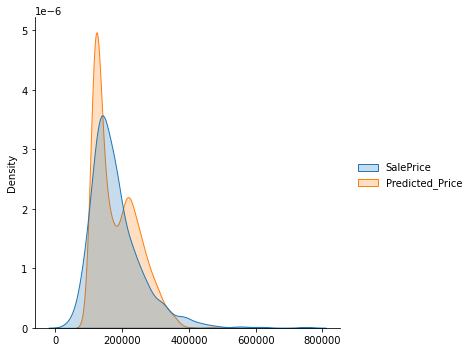

In [105]:
#rename sale test name to compare with the train data
submission.rename(columns = {'SalePrice':'Predicted_Price'}, inplace = True)

#concat 
display = pd.concat([train['SalePrice'],submission['Predicted_Price']], axis=1)
sns.displot(data=display,kind='kde',fill=True)
